In [ ]:
import numpy as np
from scipy.integrate import odeint

# Install required Python packages (only needed once, remove if already installed)

# Import matplotlib
import matplotlib.pyplot as plt 

In [14]:
def SICZ(x, t, parameters):
    # Unpack state variables
    S, I, C, Z = x

    # Total population (excluding zoospores)
    N = S + I + C

    # Unpack parameters
    beta_p = parameters['beta_p']   # transmission from infected
    beta_c = parameters['beta_c']   # transmission from carcass
    beta_z = parameters['beta_z']   # transmission from zoospore pool
    a = parameters['a']             # disease-induced death rate
    lamdaC = parameters['lamdaC']   # decay rate of carcass
    sigma = parameters['sigma']     # shedding rate from infected
    mu = parameters['mu']           # shedding rate from carcass
    lamdaZ = parameters['lamdaZ']   # decay rate of zoospores
    r = parameters['r']             # recovery rate (not used in equations, but included)

    # Differential equations
    dS = -(S * beta_p * (I / N)) - (S * beta_c * C) - (S * beta_z * Z)
    dI = (S * beta_p * (I / N)) + (S * beta_c * C) + (S * beta_z * Z) - (I * a)
    dC = (I * a) - (C * lamdaC)
    dZ = (I * sigma) + (C * mu) - (Z * lamdaZ)

    return [dS, dI, dC, dZ]

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


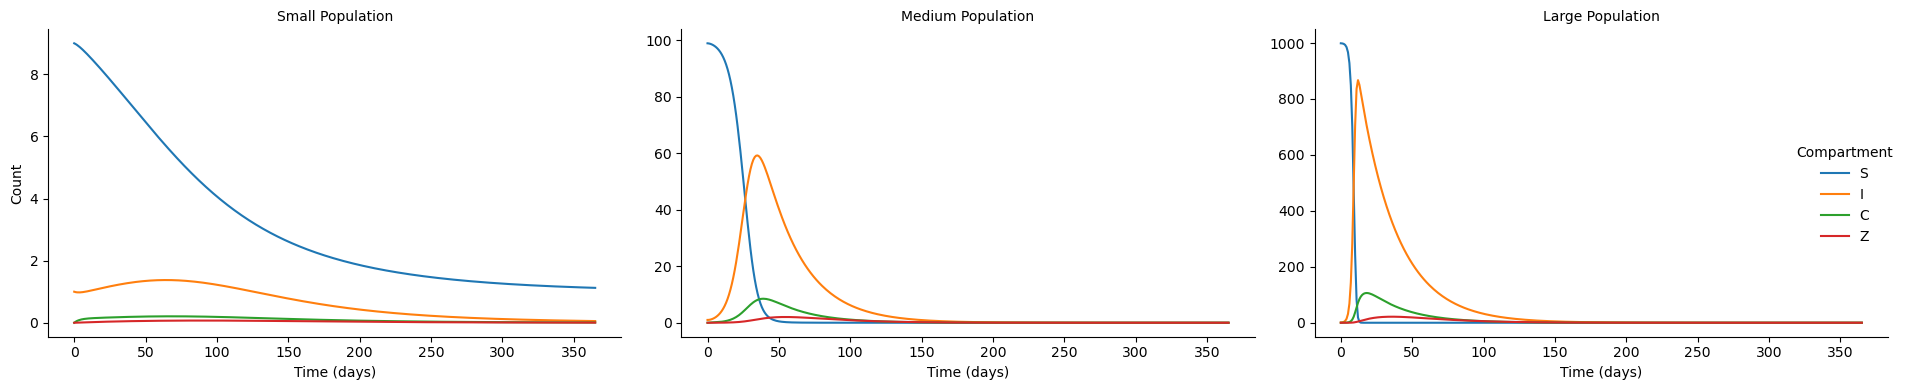

In [17]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the SICZ model
def SICZ(x, t, parameters):
    S, I, C, Z = x
    N = S + I + C

    beta_p = parameters['beta_p']
    beta_c = parameters['beta_c']
    beta_z = parameters['beta_z']
    a = parameters['a']
    lamdaC = parameters['lamdaC']
    sigma = parameters['sigma']
    mu = parameters['mu']
    lamdaZ = parameters['lamdaZ']
    # d = parameters['d']  # If natural death rate is to be included

    dS = -(S * beta_p * (I / N)) - (S * beta_c * C) - (S * beta_z * Z)
    dI = (S * beta_p * (I / N)) + (S * beta_c * C) + (S * beta_z * Z) - (I * a)
    dC = (I * a) - (C * lamdaC)
    dZ = (I * sigma) + (C * mu) - (Z * lamdaZ)

    return [dS, dI, dC, dZ]

# Initial conditions for different population sizes
initial_cond_large = [999, 1, 0, 0]
initial_cond_med = [99, 1, 0, 0]
initial_cond_small = [9, 1, 0, 0]

# Time vector (365 days)
times = np.linspace(0, 365, 365)

# Parameters
params = {
    'beta_p': 0.023,
    'beta_c': 0.023,
    'beta_z': 0.0001,
    'lamdaC': 1 / 4,
    'lamdaZ': 1 / 21.6,
    'sigma': 0.001,
    'mu': 0.01,
    'a': 1 / 26.5,
    # 'd': 0.000274  # Include if using natural death
}

# Run the model for each population size
results_large = odeint(SICZ, initial_cond_large, times, args=(params,))
results_med = odeint(SICZ, initial_cond_med, times, args=(params,))
results_small = odeint(SICZ, initial_cond_small, times, args=(params,))

# Convert results to DataFrames for plotting
df_large = pd.DataFrame(results_large, columns=['S', 'I', 'C', 'Z'])
df_large['time'] = times
df_large['Population'] = 'Large'

df_med = pd.DataFrame(results_med, columns=['S', 'I', 'C', 'Z'])
df_med['time'] = times
df_med['Population'] = 'Medium'

df_small = pd.DataFrame(results_small, columns=['S', 'I', 'C', 'Z'])
df_small['time'] = times
df_small['Population'] = 'Small'

# Combine all results
df_all = pd.concat([df_small, df_med, df_large])

# Melt for easier plotting with seaborn
df_melted = df_all.melt(id_vars=['time', 'Population'], 
                        value_vars=['S', 'I', 'C', 'Z'],
                        var_name='Compartment', value_name='Count')

# Plot using seaborn
g = sns.FacetGrid(df_melted, col="Population", hue="Compartment", col_order=["Small", "Medium", "Large"], 
                  sharey=False, height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x="time", y="Count")
g.add_legend()
g.set_axis_labels("Time (days)", "Count")
g.set_titles("{col_name} Population")
plt.tight_layout()
plt.show()

- downloaded R file and incorporated it into folder
- used ChatGPT to help translate the existing R code into python language (had to use ChatGPT since my CoPilot was not working)
- these graphs are essentially indicating how larger salamander populations will have bigger, and faster outbreaks compared to smaller population sizes. Zoospore levels seem to always remain low and carcass accumulation increases with infection.
